Anushna Prakash  
DATA 598 - Deep Learning  
January 21, 2022  
# <center> Homework 2</center>  
## 1 Edge Cases of Automatic Differentiation  
### 1.1 Derivatives of a discontinuous function  
- Define and plot a (mathematical) function $f: R → R$ which is discontinuous at $\hat{x}$ with a jump discontinuity. Clearly show the point at which $f$ is discontinuous and indicate whether it is right continuous or left continuous.  
- Implement $f$ as a DiffProg function in PyTorch so that PyTorch returns a derivative of 0 at $\hat{x}$, our point of discontinuity.  
- Implement $f$ again in DiffProg so that PyTorch now returns a derivative of −1728 at exactly the same point $\hat{x}$.  

In [1]:
# Formatting notebok
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:55% !important; }</style>"))

# Imports
import torch
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'f(x)')

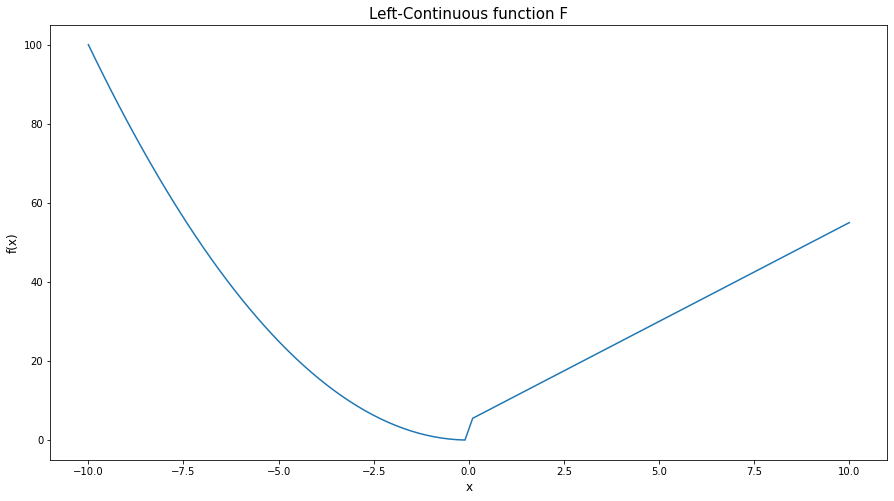

In [2]:
def my_discont_func(x):
    """
    Left-continuous function f
    Input x is a torch scalar
    """
    if x > 0:
        return (x * 5 + 5)
    else:
        return torch.pow(x, 2)

x = torch.linspace(-10, 10, steps=100)
f = [my_discont_func(i) for i in x]

fig = plt.figure(figsize=(15, 8))
plt.plot(x, f)
plt.title('Left-Continuous function F', fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)

In [3]:
# Implement f as a DiffProg function correctly
def my_diffprog_func(x):
    """
    Left-continuous function f
    Input x is a torch scalar
    """
    if x > 0:
        return (x * 5 + 5)
    else:
        return torch.pow(x, 2)

# Check positive input
x = torch.rand(1, requires_grad=True)
y = my_diffprog_func(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

# Check negative input
x = -1 * torch.ones(1, requires_grad=True)
y = my_diffprog_func(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

# Check discontinuity point
x = torch.zeros_like(x, requires_grad=True)
y = my_diffprog_func(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([8.4651], grad_fn=<AddBackward0>), y_prime: tensor([5.])
y: tensor([1.], grad_fn=<PowBackward0>), y_prime: tensor([-2.])
y: tensor([0.], grad_fn=<PowBackward0>), y_prime: tensor([0.])


In [4]:
# Implement f as a DiffProg function s.t. x' at the discontinuity point evaluates to -1728
def my_diffprog_func(x):
    """
    Left-continuous function f
    Input x is a torch scalar
    Derivative at discontinuity point evaluates to -1728
    """
    if x > 0:
        return (x * 5 + 5)
    elif x < 0:
        return torch.pow(x, 2)
    else:
        return -1728 * x

# Check positive input
x = torch.rand(1, requires_grad=True)
y = my_diffprog_func(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

# Check negative input
x = -1 * torch.ones(1, requires_grad=True)
y = my_diffprog_func(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

# Check discontinuity point
x = torch.zeros_like(x, requires_grad=True)
y = my_diffprog_func(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([8.8285], grad_fn=<AddBackward0>), y_prime: tensor([5.])
y: tensor([1.], grad_fn=<PowBackward0>), y_prime: tensor([-2.])
y: tensor([-0.], grad_fn=<MulBackward0>), y_prime: tensor([-1728.])


### 1.2 Inconsistent derivatives of a differentiable function  
- Implement $g$ as a DiffProg function in PyTorch so that PyTorch returns a derivative of 0 at $\hat{x}=0$.  
- Implement $g$ again in DiffProg so that PyTorch now returns a derivative of 897 at exactly the same point $\hat{x}=0$.  

In [5]:
def diffprog_g(x):
    """
    Continuous function g
    Input x is a torch scalar
    """
    return torch.pow(x, 2)

# Check discontinuity point
x = torch.zeros_like(x, requires_grad=True)
y = diffprog_g(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([0.], grad_fn=<PowBackward0>), y_prime: tensor([0.])


In [6]:
def diffprog_g(x):
    """
    Continuous function g
    Input x is a torch scalar
    Derivative at x=0 evaluates to 897
    """
    if x != 0:
        return torch.pow(x, 2)
    else:
        return 897 * x

# Check discontinuity point
x = torch.zeros_like(x, requires_grad=True)
y = diffprog_g(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: tensor([0.], grad_fn=<MulBackward0>), y_prime: tensor([897.])


### 1.3 Derivatives with Loops: When is it Valid?  
- Write a DiffProg function in PyTorch which takes an input $x_0$ and iteratively updates $x_{t+1} ← \frac{x_{t}}{2}$ until a stopping criterion $|x_{t}| < 10^{−6}$ is satisfied.  
- Plot this function in the range [−1, 1]. Are the derivatives of this function well-defined everywhere?  
- Find a point $\hat{x}$ such that implementing the stopping criterion as $|x_{t}| < 10^{−6}$ or $|x_{t}| \leq 10^{−6}$ changes the value of the derivative returned by PyTorch. Is the derivative mathematically well-defined at $\hat{x}$.  
- Write out the (mathematical) function $\psi: R → R$ which is implemented by this DiffProg function.  

Text(0, 0.5, 'f(x)')

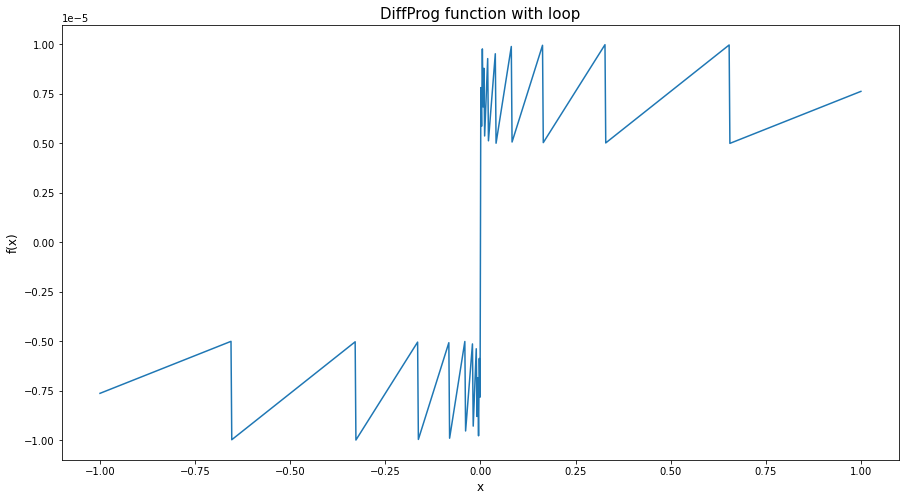

In [7]:
def diffprog_loop(x_0):
    """
    Takes intial x_0 as torch scalar to start
    Updates until |x| < 10e-6
    """
    x = x_0
    while torch.abs(x) >= 10e-6:
        x = x / 2
    return x

x = torch.linspace(-1, 1, 1000)
f = [diffprog_loop(i) for i in x]
# f_prime = torch.autograd.grad(outputs=f, inputs=[x], allow_unused=True)[0]

fig = plt.figure(figsize=(15, 8))
plt.plot(x, f, label='f')
# plt.plot(x, f_prime, label="f'")
plt.title('DiffProg function with loop', fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)

This function is not continuous and has many points of discontinuity, so it is not differentiable almost anywhere.

In [8]:
x = torch.tensor(10e-6, requires_grad=True)
y = diffprog_loop(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: 4.999999873689376e-06, y_prime: 0.5


In [37]:
def diffprog_loop(x_0):
    """
    Takes intial x_0 as torch scalar to start
    Updates until x <= 10e-6
    """
    x = x_0
    while torch.abs(x) > 10e-6:
        print(x)
        x = x / 2
    return x

x = torch.tensor(10e-6, requires_grad=True)
y = diffprog_loop(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

y: 9.999999747378752e-06, y_prime: 1.0


At $\hat{x}=10^{-6}$, the derivative produced by PyTorch changes from $f'=0.5$ to $f'=1$ when the stopping criterion changes.  
The function for $\psi: \mathbb{R} → \mathbb{R}$ with $x_0$ as the initial starting value is  
$$ x_t = \begin{cases}
    \frac{x}{2},& \text{if } |x_t| \geq 10^{-6}\\
    x_t              & \text{otherwise}
\end{cases}
$$



### 1.4 When can we not use branches in differentiable programs?  
- Plot this function. Is it continuous? Is it differentiable almost everywhere?  
- Implement this in PyTorch. Try to compute its derivatives. What do we get?  
- Can we train a differentiable program containing this function as a component using stochastic gradient descent? Why or why not? Justify your answer in words.

Text(0, 0.5, '$\\phi(x)$')

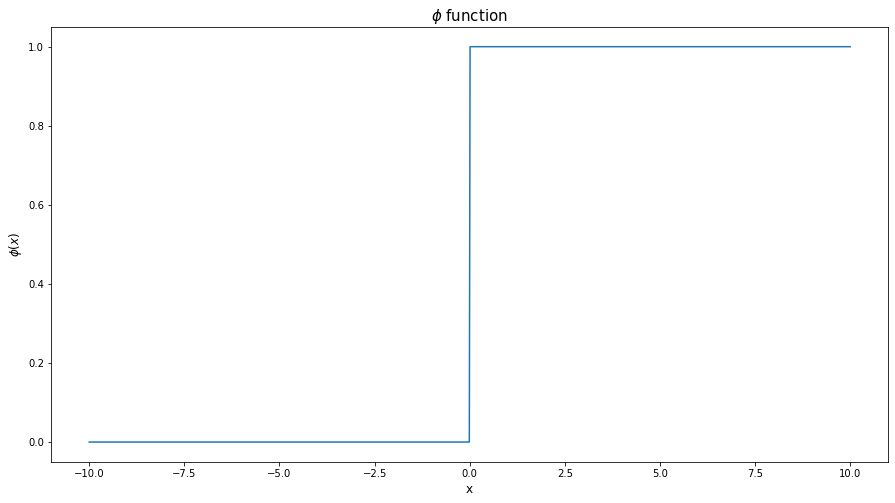

In [10]:
def function_h(x):
    """
    Returns 1 if x is positive
    Else 0
    x is a torch scalar.
    """
    if x >= 0:
        return torch.ones_like(x, requires_grad=True)
    else:
        return torch.zeros_like(x, requires_grad=True)

x = torch.linspace(-10, 10, 1000, requires_grad=True)
function_vals = [function_h(i).item() for i in x]

fig = plt.figure(figsize=(15, 8))
plt.plot(x.detach().numpy(), function_vals)
plt.title('$\phi$ function', fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('$\phi(x)$', fontsize=12)

This function is discontinuous at $x=0$ but is differentiable almost everywhere.  

In [43]:
x = torch.rand(1, requires_grad=True) 
print('x = ', x)
# call the function using the `apply` method
y = function_h(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = -1 * torch.rand(1, requires_grad=True) 
print('x = ', x)
# call the function using the `apply` method
y = function_h(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x = torch.zeros(1, requires_grad=True) 
print('x = ', x)
# call the function using the `apply` method
y = function_h(x)
y_prime = torch.autograd.grad(outputs=y, inputs=[x], allow_unused=True)[0]
print(f'y: {y}, y_prime: {y_prime}')

x =  tensor([0.3186], requires_grad=True)
y: tensor([1.], requires_grad=True), y_prime: None
x =  tensor([-0.8586], grad_fn=<MulBackward0>)
y: tensor([0.], requires_grad=True), y_prime: None
x =  tensor([0.], requires_grad=True)
y: tensor([1.], requires_grad=True), y_prime: None


We find that PyTorch is unable to compute the derivatives for this function since it is returning `None` type.  

We cannot use this kind of function for gradient descent because while there are many minimums for the function, the derivative of it is 0 everywhere. Therefore trying to iterate over this gradient will be useless since there is no direction of "steepest" descent - there is no where to move.

## 2 Data Augmentation  
Data augmentation can be applied at training time or testing time.
- Training time: in each iteration, we sample a minibatch, take one transformation per-image and use those instead to compute the minibatch stochastic gradient. The rest of the training loop continues as usual.  
- Test time: we predict an output for an image $x$ as follows. Take augmentations $x_1, x_2, · · · , x_T$ of $x$. For each augmented image $x_i$, obtain prediction $y_i$. The combined prediction $y$ for image $x$ is obtained by taking a majority vote from $y_1, · · · , y_T$. Note that the augmentations can only be used to compute the accuracy but not the loss.  

In this exercise, we will try four combinations:  
1. No data augmentation for training or testing
2. Use data augmentation for training but not for testing  
3. Use data augmentation for testing but not for training  
4. Use data augmentation for both training and testing  

X_train.shape = torch.Size([6000, 28, 28])
n_train: 6000, n_test: 10000
Image size: torch.Size([28, 28])


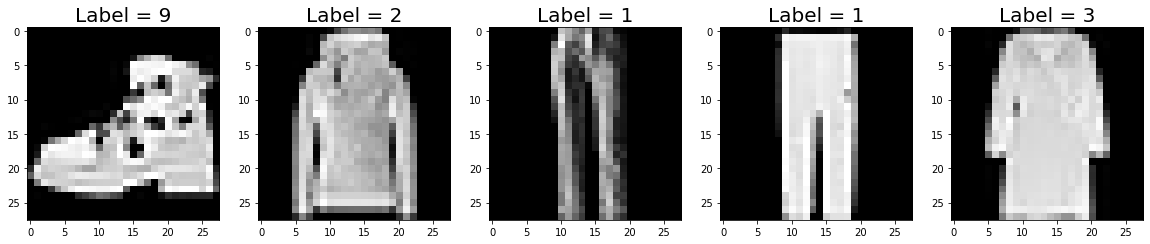

In [13]:
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

# download dataset (~117M in size)
train_dataset = FashionMNIST('./data', train=True, download=True)
X_train = train_dataset.data # torch tensor of type uint8
y_train = train_dataset.targets # torch tensor of type Long
test_dataset = FashionMNIST('./data', train=False, download=True)
X_test = test_dataset.data
y_test = test_dataset.targets

# choose a subsample of 10% of the data:
idxs_train = torch.from_numpy(
    np.random.choice(X_train.shape[0], replace=False, size=X_train.shape[0]//10)).long()
X_train, y_train = X_train[idxs_train], y_train[idxs_train]
# idxs_test = torch.from_numpy(
#     np.random.choice(X_test.shape[0], replace=False, size=X_test.shape[0]//10))
# X_test, y_test = X_test[idxs_test], y_test[idxs_test]

print(f'X_train.shape = {X_train.shape}')
print(f'n_train: {X_train.shape[0]}, n_test: {X_test.shape[0]}')
print(f'Image size: {X_train.shape[1:]}')

f, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, idx in enumerate(np.random.choice(X_train.shape[0], 5)):
    ax[i].imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)
    ax[i].set_title(f'Label = {y_train[idx]}', fontsize=20)
    
# Normalize dataset: pixel values lie between 0 and 255
# Normalize them so the pixelwise mean is zero and standard deviation is 1

X_train = X_train.float()  # convert to float32
X_train = X_train.view(-1, 784)
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mean[None, :]) / (std[None, :] + 1e-6)  # avoid divide by zero

X_test = X_test.float()
X_test = X_test.view(-1, 784)
X_test = (X_test - mean[None, :]) / (std[None, :] + 1e-6)

In [14]:
from torch.nn.functional import cross_entropy

def compute_objective(net, X, y):
    """ Compute the multinomial logistic loss. 
        net is a module
        X of shape (n, d) and y of shape (n,)
    """
    # send 
    score = net(X)
    # PyTorch's function cross_entropy computes the multinomial logistic loss
    return cross_entropy(input=score, target=y, reduction='mean') 

@torch.no_grad()
def compute_accuracy(net, X, y, augment=False, augmentations=8):
    """ Compute the classification accuracy
        If augment flag is True, then transform the X images augmentations number of times
        and compute accuracy based on majority vote from augmented images.
        X of shape (n, d) and y of shape (n,)
    """
    if augment:
        augment_predictions = torch.empty((X.shape[0], augmentations), dtype=torch.float32)
        for i in range(augmentations):
            # Get augmentation
            X_transformed = transform_selected_data(X)
            # Get score
            score = net(X_transformed)
            # Get prediction
            pred = torch.argmax(score, axis=1)  # returns 1d tensor
            augment_predictions[:, i] = pred

        # Take majority vote
        predictions = torch.mode(augment_predictions, axis=1)[0]
    else:
        score = net(X)
        predictions = torch.argmax(score, axis=1)  # class with highest score is predicted
    
    return (predictions == y).sum() * 1.0 / y.shape[0]

@torch.no_grad()
def compute_logs(net, augment=False, augmentations=8, verbose=False):
    train_loss = compute_objective(net, X_train, y_train)
    test_loss = compute_objective(net, X_test, y_test)
    
    # Do not report train accuracy on augmented images
    train_accuracy = compute_accuracy(net, X_train, y_train)
    # Can choose to augment test images and get test accuracy
    test_accuracy = compute_accuracy(net, X_test, y_test, augment, augmentations)
    if verbose:
        print(('Train Loss = {:.3f}, Train Accuracy = {:.3f}, ' + 
               'Test Loss = {:.3f}, Test Accuracy = {:.3f}').format(
                train_loss.item(), train_accuracy.item(), 
                test_loss.item(), test_accuracy.item())
    )
    return (train_loss, train_accuracy, test_loss, test_accuracy)

def minibatch_sgd_one_pass(net, X, y, learning_rate, batch_size, transform_flag=False, verbose=False):
    num_examples = X.shape[0]
    average_loss = 0.0
    num_updates = int(round(num_examples / batch_size))
    for i in range(num_updates):
        idxs = np.random.choice(num_examples, size=(batch_size,))
        # Randomly transform the images in the batch
        if transform_flag:
            X_transformed = transform_selected_data(X[idxs])
        else:
            X_transformed = X[idxs]

        objective = compute_objective(net, X_transformed, y[idxs]) 
        average_loss = 0.99 * average_loss + 0.01 * objective.item()
        
        if verbose and (i+1) % 100 == 0:
            print(average_loss)
        
        gradients = torch.autograd.grad(outputs=objective, inputs=net.parameters())
        # perform SGD update. IMPORTANT: Make the update inplace!
        with torch.no_grad():
            for (w, g) in zip(net.parameters(), gradients):
                w -= learning_rate * g
    return net

In [15]:
class MyConvNet(torch.nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv_ensemble_1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.conv_ensemble_2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.fully_connected_layer = torch.nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # reshape input; convolutions need a channel
        out = self.conv_ensemble_1(x)  # first convolution + relu + pooling
        out = self.conv_ensemble_2(out) # second convolution + relu + pooling
        out = out.view(out.shape[0], -1)  # flatten output
        out = self.fully_connected_layer(out)  # output layer
        return out

In [16]:
import torchvision.transforms as transforms

def transform_selected_data(X):
    # X is of shape (B, 784), where B is the batch_size
    X = X.view(-1, 28, 28)  # reshape to 28x28
    transform1 = transforms.RandomResizedCrop((28, 28), scale=(0.75, 1.0), ratio=(0.75, 1.33), interpolation=2)
    transform2 = transforms.RandomRotation((-10, 10))
    X_transformed = transform2(transform1(X))
    return X_transformed.view(-1, 784) # reshape into a vector

In [19]:
def compute_cnn_results(
    model, X_train, y_train, # CNN & tensors
    learning_rate, batch_size, max_iters, # Learning rate, batch size, max iterations paramters
    transform_flag=False, # Flag to transform the training images
    augment_flag=False, num_augmentations=8 # flag to augment the test data & how many augmentations
):
    """
    Train the passed CNN on X_train and optionally transform the training images.
    Optionally augment the testing images.
    Outputs a list of logged outputs
    """
    log = []
    print('Iteration 0', end=', ')
    # Don't transform or augment for 0th log
    log.append(
        compute_logs(model, verbose=True)
    )
    
    for j in range(MAX_ITERS):
        model = minibatch_sgd_one_pass(
            model, X_train, y_train,
            learning_rate, batch_size,
            transform_flag=transform_flag, verbose=False
        )
        print(f'Iteration {j+1}', end=', ')
        log.append(
            compute_logs(model, augment=augment_flag, augmentations=num_augmentations)
        )
        # End when model perfectly interpolates training data (training acc == 100%)
        if log[-1][1] == 1.0:
            break
    
    return np.asarray(log)

In [20]:
model = MyConvNet(num_classes=10)
LEARNING_RATE = 0.04
BATCH_SIZE = 16
MAX_ITERS = 100

logs = []

# No augmentations on training or testing
log1 = compute_cnn_results(
    model, X_train, y_train,
    LEARNING_RATE, BATCH_SIZE, MAX_ITERS,
    transform_flag=False, augment_flag=False
)
logs.append(log1)

# Augment training but not testing
log2 = compute_cnn_results(
    model, X_train, y_train,
    LEARNING_RATE, BATCH_SIZE, MAX_ITERS,
    transform_flag=True, augment_flag=False
)
logs.append(log2)

# Augment testing but not training
log3 = compute_cnn_results(
    model, X_train, y_train,
    LEARNING_RATE, BATCH_SIZE, MAX_ITERS,
    transform_flag=False, augment_flag=True
)
logs.append(log3)

# Augment training and testing
log4 = compute_cnn_results(
    model, X_train, y_train,
    LEARNING_RATE, BATCH_SIZE, MAX_ITERS,
    transform_flag=True, augment_flag=True
)
logs.append(log4)

Iteration 0, Train Loss = 2.287, Train Accuracy = 0.137, Test Loss = 4.767, Test Accuracy = 0.128
Iteration 1, Iteration 2, Iteration 3, Iteration 4, Iteration 5, Iteration 6, Iteration 7, Iteration 8, Iteration 9, Iteration 10, Iteration 11, Iteration 12, Iteration 13, Iteration 14, Iteration 15, Iteration 16, Iteration 17, Iteration 18, Iteration 19, Iteration 20, Iteration 21, Iteration 22, Iteration 23, Iteration 24, Iteration 25, Iteration 26, Iteration 27, Iteration 28, Iteration 29, Iteration 30, Iteration 31, Iteration 0, Train Loss = 0.004, Train Accuracy = 1.000, Test Loss = 52.032, Test Accuracy = 0.864
Iteration 1, Iteration 2, Iteration 3, Iteration 4, Iteration 5, Iteration 6, Iteration 7, Iteration 8, Iteration 9, Iteration 10, Iteration 11, Iteration 12, Iteration 13, Iteration 14, Iteration 15, Iteration 16, Iteration 17, Iteration 18, Iteration 19, Iteration 20, Iteration 21, Iteration 22, Iteration 23, Iteration 24, Iteration 25, Iteration 26, Iteration 27, Iteration

### Deliverable 1: Report final test accuracies

In [31]:
for log in logs:
    print('Final test accuracy: ', str(log[-1, 3]))

Final test accuracy:  0.8645
Final test accuracy:  0.8674
Final test accuracy:  0.8686
Final test accuracy:  0.869


### Deliverable 2: Plot 4 Models

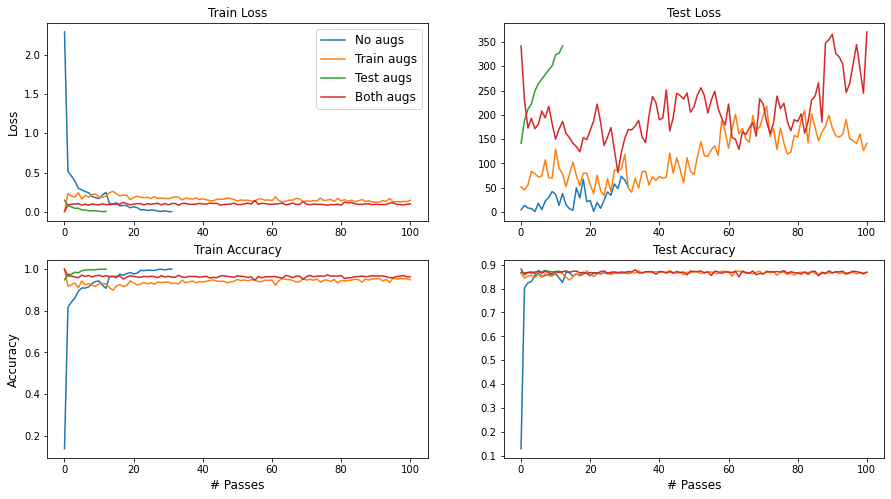

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Plot no augmentations
ax[0][0].plot(logs[0][:, 0], label='No augs')
ax[0][1].plot(logs[0][:, 2], label='No augs')
ax[1][0].plot(logs[0][:, 1], label='No augs')
ax[1][1].plot(logs[0][:, 3], label='No augs')
# Plot train augmentations
ax[0][0].plot(logs[1][:, 0], label='Train augs')
ax[0][1].plot(logs[1][:, 2], label='Train augs')
ax[1][0].plot(logs[1][:, 1], label='Train augs')
ax[1][1].plot(logs[1][:, 3], label='Train augs')
# Plot test augmentations
ax[0][0].plot(logs[2][:, 0], label='Test augs')
ax[0][1].plot(logs[2][:, 2], label='Test augs')
ax[1][0].plot(logs[2][:, 1], label='Test augs')
ax[1][1].plot(logs[2][:, 3], label='Test augs')
# Plot both augmentations
ax[0][0].plot(logs[3][:, 0], label='Both augs')
ax[0][1].plot(logs[3][:, 2], label='Both augs')
ax[1][0].plot(logs[3][:, 1], label='Both augs')
ax[1][1].plot(logs[3][:, 3], label='Both augs')

ax[1][1].set_xlabel('# Passes', fontsize=12)
ax[1][0].set_xlabel('# Passes', fontsize=12)
ax[0][0].set_ylabel('Loss', fontsize=12)
ax[1][0].set_ylabel('Accuracy', fontsize=12)
ax[0][0].set_title('Train Loss', fontsize=12)
ax[0][1].set_title('Test Loss', fontsize=12)
ax[1][0].set_title('Train Accuracy', fontsize=12)
ax[1][1].set_title('Test Accuracy', fontsize=12)
ax[0][0].legend(fontsize=12)